# Lab Customer Analysis Round 7

## 01 - Problem (case study)

The objective of this data is to understand customer demographics and buying behavior. We have to use predictive analytics to analyze the most profitable customers and how they interact and take targeted actions to increase profitable customer response.

In [1]:
import pandas as pd  
import numpy as np

## 02 - Getting Data

In [2]:
marketing = pd.read_csv('marketing_customer_analysis.csv')
print(type(marketing))
display(marketing.head())
display(marketing.tail(7))
print(marketing.shape)

<class 'pandas.core.frame.DataFrame'>


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9127,TF56202,California,5032.165498,No,Basic,College,2/12/11,Employed,M,66367,...,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


(9134, 24)


## 03 - Cleaning/Wrangling/EDA

In Lab1 we worked with three files. As of Lab2, we were provided with a single file that already considered the initial treatment of the data, such as: the elimination of the variable "vehicle_type" that had 5,482 NaN values ​​(50.25% of the total values ​​of the variable) and the elimination of NaN values ​​in the variables "state", "response", "months_since_last_claim", "number_of_open_complaints", "vehicle_class" and "vehicle_size". So, for this final round I just rename columns and transform to data time format the variable "effective_to_date".

In [3]:
def clean_data(marketing):
    marketing.columns=[e.lower().replace(' ', '_') for e in marketing.columns]
    marketing['effective_to_date']=pd.to_datetime(marketing['effective_to_date'], errors='coerce')
    return marketing

clean_data(marketing)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


We checked that there aren't NaN values.

In [4]:
marketing.isna().sum()
round(marketing.isna().sum()/len(marketing),4)*100  

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

Categorical Features

In [5]:
categorical = marketing.select_dtypes(include=['object'])
display(categorical)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Numerical Features

In [6]:
numerical = marketing.select_dtypes(np.number)
display(numerical)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Exploration

In [7]:
marketing.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [8]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


# 04 - Processing Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Dealing with outliers

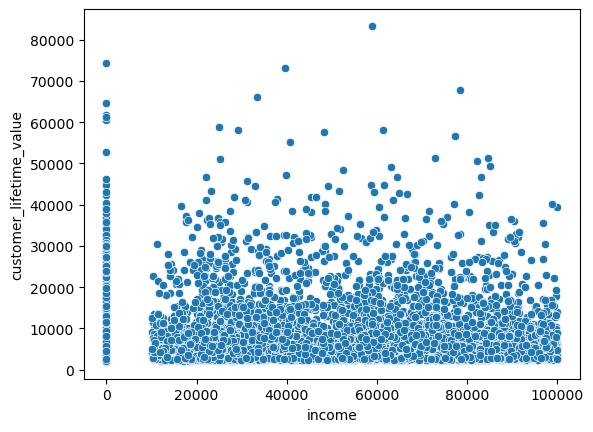

In [10]:
sns.scatterplot(x='income',y='customer_lifetime_value',data=marketing)
plt.show()

The problem that I can see with the income variable more than outliers is that have a lot of 0 values. 

How I explained in Lab7, to improve the model, although was not a correlation greater than 0.9 in the original linear regression model, I will remove the variable "monthly_premium_auto" because of its correlation with "total_claim_amount" and will eliminate the rows with "0" from income.

In [11]:
y = marketing['customer_lifetime_value']
X = marketing[['income']]

In [12]:
reduced_marketing = marketing.drop(['monthly_premium_auto'],axis=1)
reduced_marketing.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
marketing = marketing[marketing['income'] != 0]

Normalization

Normalize the numerical variables, but choosing just 3 variables: customer_life_time, income and monthly_premium_auto

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = marketing['customer_lifetime_value']
X = marketing.drop(['customer_lifetime_value'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [15]:
X_num

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
2,48767,108,18,38,0,2,566.472247
4,43836,73,12,44,0,1,138.130879
5,62902,69,14,94,0,2,159.383042
6,55350,67,0,13,0,9,321.600000
...,...,...,...,...,...,...,...
9127,66367,64,6,48,0,3,307.200000
9128,47761,104,16,58,0,1,541.282007
9129,71941,73,18,89,0,2,198.234764
9130,21604,79,14,28,0,1,379.200000


In [16]:
X_num.describe()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,50456.580461,92.963034,15.046941,47.832624,0.381840,2.951005,377.840789
std,24305.956566,34.615160,10.064762,27.895350,0.905048,2.390613,252.648952
min,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,28432.000000,68.000000,6.000000,24.000000,0.000000,1.000000,210.100003
50%,48081.000000,83.000000,14.000000,48.000000,0.000000,2.000000,340.800000
75%,70187.000000,109.000000,23.000000,71.000000,0.000000,4.000000,498.612632
max,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [17]:
X_num1=marketing._get_numeric_data().iloc[:, 0:3].dropna()
X_num1.head()

,customer_lifetime_value,income,monthly_premium_auto
0,2763.519279,56274,69
2,12887.431650,48767,108
4,2813.692575,43836,73
5,8256.297800,62902,69
6,5380.898636,55350,67


In [18]:
transformer = MinMaxScaler()
transformer.fit(X_num1)
x_normalized = transformer.transform(X_num1)
x_normalized = pd.DataFrame(x_normalized,columns=X_num1.columns)
x_normalized.head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.007926,0.514064,0.033898
1,0.132596,0.430601,0.199153
2,0.008544,0.375778,0.050847
3,0.075566,0.587755,0.033898
4,0.040157,0.503791,0.025424


In [19]:
pd.DataFrame(x_normalized, columns=X_num1.columns).corr()

,customer_lifetime_value,income,monthly_premium_auto
customer_lifetime_value,1.000000,0.002915,0.399491
income,0.002915,1.000000,-0.012372
monthly_premium_auto,0.399491,-0.012372,1.000000


In [20]:
transformer = StandardScaler()
transformer.fit(X_num1)
x_standardized = transformer.transform(X_num1)
x_standardized = pd.DataFrame(x_standardized,columns=X_num1.columns)
x_standardized.head()

,customer_lifetime_value,income,monthly_premium_auto
0,-0.772349,0.239359,-0.692321
1,0.684632,-0.069518,0.434436
2,-0.765128,-0.272405,-0.576756
3,0.018143,0.512069,-0.692321
4,-0.395669,0.201341,-0.750103


In [21]:
x_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6817.0,3.626302e-17,1.000073,-0.864976,-0.581341,-0.333824,0.136077,10.821691
income,6817.0,3.771859e-17,1.000073,-1.663072,-0.906206,-0.097744,0.811812,2.037692
monthly_premium_auto,6817.0,7.379636e-18,1.000073,-0.923450,-0.721212,-0.287844,0.463327,5.894872


In [22]:
pd.concat([X_num1,x_normalized,x_standardized],axis=1)

,customer_lifetime_value,income,monthly_premium_auto,customer_lifetime_value,income,monthly_premium_auto,customer_lifetime_value,income,monthly_premium_auto
0,2763.519279,56274.0,69.0,0.007926,0.514064,0.033898,-0.772349,0.239359,-0.692321
2,12887.431650,48767.0,108.0,0.008544,0.375778,0.050847,-0.765128,-0.272405,-0.576756
4,2813.692575,43836.0,73.0,0.040157,0.503791,0.025424,-0.395669,0.201341,-0.750103
5,8256.297800,62902.0,69.0,0.271011,0.044861,0.042373,2.302244,-1.497051,-0.634538
6,5380.898636,55350.0,67.0,0.064876,0.208741,0.135593,-0.106792,-0.890571,0.001068
...,...,...,...,...,...,...,...,...,...
6790,NaN,NaN,NaN,0.046875,0.921818,0.055085,-0.317166,1.748359,-0.547865
6801,NaN,NaN,NaN,0.400114,0.111770,0.203390,3.811028,-1.249439,0.463327
6804,NaN,NaN,NaN,0.015253,0.548452,0.097458,-0.686717,0.366621,-0.258953
6811,NaN,NaN,NaN,0.174147,0.562672,0.309322,1.170222,0.419246,1.185607


Encoding Categorical Data

In [23]:
X_cat = X.select_dtypes(include = object)

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_cat) 
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head(20)

[array(['AA11235', 'AA16582', 'AA34092', ..., 'ZZ54454', 'ZZ83340',
       'ZZ89380'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired'], dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury C

,customer_AA11235,customer_AA16582,customer_AA34092,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB21519,customer_AB23825,customer_AB26022,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# 4. Concat DataFrames.
X = pd.concat([x_normalized, onehot_encoded], axis=1)

In [26]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,customer_AA11235,customer_AA16582,customer_AA34092,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.007926,0.514064,0.033898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.132596,0.430601,0.199153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.008544,0.375778,0.050847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.075566,0.587755,0.033898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.040157,0.503791,0.025424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Splitting into train set and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5453, 6876)
(1364, 6876)
(5453,)
(1364,)


In [29]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,customer_AA11235,customer_AA16582,customer_AA34092,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
6443,0.040263,0.626968,0.317797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1620,0.013769,0.558203,0.093220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2820,0.086649,0.568832,0.241525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1643,0.003139,0.525894,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2877,0.074704,0.114871,0.186441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [30]:
y_train.head()

8607    5389.499465
2143    3237.996209
3770    9156.272726
2172    2374.798861
3843    8186.308757
Name: customer_lifetime_value, dtype: float64

# 05 - Modeling

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
marketing2 = marketing[['customer_lifetime_value']].copy()
marketing2.columns = ["y_real"]
marketing2['y_pred'] = lm.predict(X)
marketing2['error'] = marketing2['y_real'] - marketing2['y_pred']
marketing2

,y_real,y_pred,error
0,2763.519279,2763.519279,4.529284e-10
2,12887.431650,12887.431650,3.092282e-10
4,2813.692575,2813.692575,7.867129e-10
5,8256.297800,8256.297800,4.547474e-11
6,5380.898636,5380.898636,2.946763e-10
...,...,...,...
9127,5032.165498,5032.165498,-3.201421e-10
9128,4100.398533,4100.398533,1.837179e-10
9129,23405.987980,20751.200820,2.654787e+03
9130,3096.511217,3096.511217,4.638423e-11


# 06 - Model Validation

R2

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

In [35]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.938724865530716

In [36]:
y_pred_test

array([6235.31674278, 7814.05776523, 5407.3278797 , ..., 4808.53685998,
       5368.89979569, 6023.90514202])

MSE

In [37]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred_test))

1863.4697531523186

RMSE

In [38]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

1863.4697531523186

MAE

In [39]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

857.7332551715771


# 07 - Reporting

Although I am not sure that my interpretation is correct, but it seems that this linear regression model can better predict the value of customers. In the case of the numerical variables, the ones that really help to explain the variable "customer_lifetime_value" are the variables "income" and "monthly_premium_auto" once normalized. Regarding the categorical variables, I did not identify how to select only some variables because the fact of including the "customer" variable continues to cause me confusion.